In [1]:
import os

# Create standardized project structure
candidate_name = "sajid"
base_dir = f"ds_{candidate_name}"

structure = [
    base_dir,
    f"{base_dir}/csv_files",
    f"{base_dir}/outputs",
]

# Create the folders
for path in structure:
    os.makedirs(path, exist_ok=True)

# Confirm structure
structure


['ds_sajid', 'ds_sajid/csv_files', 'ds_sajid/outputs']

In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





In [4]:
# 2. Load Datasets
trader_df = pd.read_csv("ds_sajid/csv_files/historical_data.csv") 
sentiment_df = pd.read_csv("ds_sajid/csv_files/fear_greed_index.csv")

# Clean column names
trader_df.columns = trader_df.columns.str.strip()
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower()


In [5]:
#  Step 3: 

# Fix incomplete time format by appending missing '00'
trader_df['Timestamp IST'] = trader_df['Timestamp IST'].astype(str)
trader_df['Timestamp IST'] = trader_df['Timestamp IST'].str.replace(
    r'(\d{2}-\d{2}-\d{4} \d{2}):$', r'\1:00', regex=True
)

# Parse datetime safely
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True, errors='coerce')

# Drop rows where parsing failed
trader_df = trader_df.dropna(subset=['Timestamp IST'])

# Extract date
trader_df['date'] = trader_df['Timestamp IST'].dt.date


In [6]:
# Step 4: Parse sentiment date and merge
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Merge trader data with sentiment on 'date'
merged_df = pd.merge(trader_df, sentiment_df, on='date', how='inner')

# Save merged data to CSV for reference
merged_df.to_csv("ds_sajid/csv_files/merged_data.csv", index=False)


In [7]:
# Preview the cleaned & merged data
merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


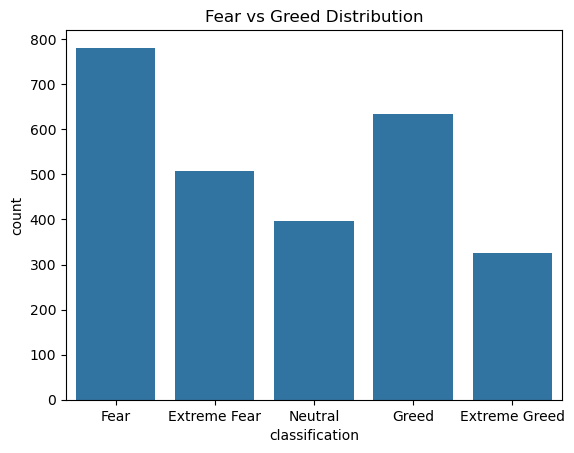

In [8]:
#  Distribution of Sentiment
sns.countplot(data=sentiment_df, x='classification')
plt.title("Fear vs Greed Distribution")
plt.savefig("ds_sajid/outputs/sentiment_dist.png")
plt.show()


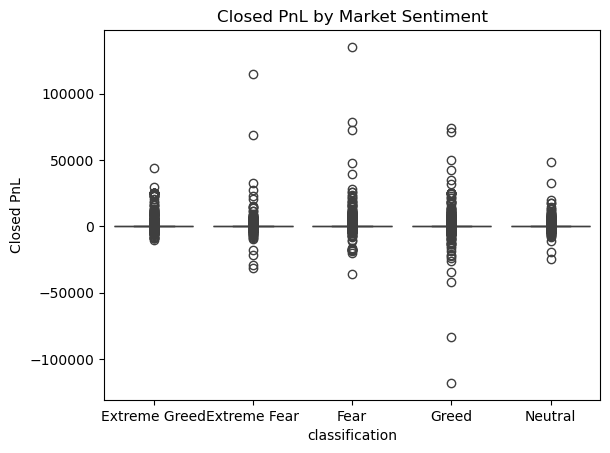

In [9]:
#  Closed PnL by Sentiment
merged_df = merged_df.dropna(subset=['Closed PnL'])  
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title("Closed PnL by Market Sentiment")
plt.savefig("ds_sajid/outputs/pnl_by_sentiment.png")
plt.show()


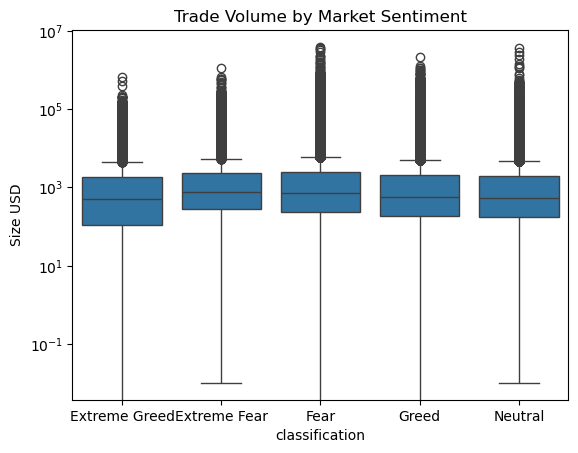

In [10]:
#  Trade Volume by Sentiment (Size USD)
merged_df = merged_df.dropna(subset=['Size USD'])
sns.boxplot(data=merged_df, x='classification', y='Size USD')
plt.yscale('log')  # Handle skew
plt.title("Trade Volume by Market Sentiment")
plt.savefig("ds_sajid/outputs/volume_by_sentiment.png")
plt.show()


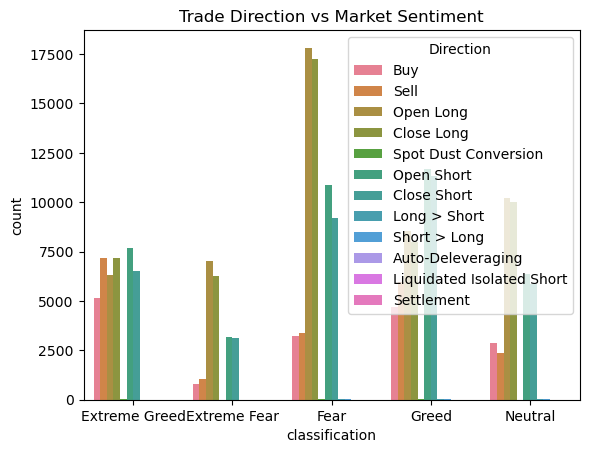

In [11]:
#  Trade Direction by Sentiment
sns.countplot(data=merged_df, x='classification', hue='Direction')
plt.title("Trade Direction vs Market Sentiment")
plt.savefig("ds_sajid/outputs/direction_by_sentiment.png")
plt.show()
